# Star Wars Survey

While waiting for Star Wars: The Force Awakens, the team at FiveThirtyEight was interested in answering some questions about Star Wars fans. One question that particularly interested the team was: `Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?`

The team needed to collect data before they could get started answering this question. They used SurveyMonkey, an online survey tool, to survey Star Wars fans.

The data has several columns, including:

- RespondentID -- An anonymized ID of the person taking the survey.
- Gender -- Gender of the respondent.
- Age -- Age of the respondent.
- Household Income -- Income of the respondent.
- Education -- Education level of the respondent.
- Location (Census Region) -- Location of the respondent.
- Have you seen any of the 6 films in the Star Wars franchise? -- Yes or No response.
- Do you consider yourself to be a fan of the Star Wars film franchise? -- Yes or No response.

There are several other columns, which involve questions about the Star Wars movies. Some questions involved checkboxes, where someone was asked which of several options they liked, and to check all the ones they did like. This type of data is hard to represent in columnar format, and you'll be cleaning up the columns extensively in this project.

This dataset needs a lot of cleaning, which makes it a good place to practice the skills you've been learning so far. The first step you'll take is to remove invalid rows. `RespondentID` is supposed to be a unique ID for each respondent, but it's blank in some rows. You'll need to remove any rows with an invalid `RespondentID`.

In [1]:
import pandas as pd

star_wars = pd.read_csv(r"star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.shape

(1187, 38)

In [70]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [71]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.shape

(1186, 38)

## Cleaning Up Yes/No Columns

Take a look at the next two columns, which are:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

You'll see that they are both Yes/No questions. There's another possible value they can take on, NaN, when a respondent chose not to answer that question. You can use the [value_counts()](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.Series.value_counts.html) method on a Series to see all the unique values in a column, and the counts of each value.

Both columns are currently string types -- `Yes` or `No`. In order to make it a bit easier to analyze down the line, convert each column to a Boolean, with only True, False, or NaN. Booleans are easier to work with because you can select the rows that are True or False without having to do a string comparisons.

You can use the [map()](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.map.html) method on Series to do this conversion.

If you have a Series that looks like this:
```python
series = ["Yes", "No", NaN, "Yes"]
```

You can use a dictionary to define a mapping from each value in series to a new value:
```python
yes_no = {
    "Yes": True,
    "No": False
}
```

Then, you can call the map function to perform the mapping:
```python
series = series.map(yes_no)
```
series will end up looking like this:
```python
[True, False, NaN, True]
```

In [72]:
yes_no = {"Yes": True, "No": False}

for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Up Checkbox Columns
The next 6 columns represent a checkbox question. `The respondent was asked Which of the following Star Wars films have you seen? Please select all that apply.`, and then was able to check off a series of boxes indicating which movies they saw.

The columns that represent this data are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` -- whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` -- whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 5` -- whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 6` -- whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
- `Unnamed: 7` -- whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 8` -- whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

You need to convert each of these columns to a Boolean, then rename the column to have a more clear name. You can do the Boolean conversion like you did earlier, except you'll need to include the movie title and NaN in the mapping dictionary.

For example, if the column Series looks like this:
```python
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
```

You can use a mapping dictionary that looks like this:
```python
{
    "Star Wars: Episode I  The Phantom Menace": True,
    NaN: False
}
```

After you call the map() method on the Series, the column should only contain True or False values.

After the values are converted with the map method, you can rename the columns to better reflect what the values represent. You can use the [rename()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) method on Dataframes for this.

The rename method works a lot like map. You pass it a dictionary that maps current column names to new ones:
```python
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})
```

The rename method will only rename columns specified in the dictionary, and will not change the names of other columns. The above code will rename the `Which of the following Star Wars films have you seen? Please select all that apply.` column to `seen_1`.

In [73]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [74]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

In [75]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Up Ranking Columns
The next 6 columns ask the respondent to rank the Star Wars movies in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite. Each of the following columns can contain the values 1, 2, 3, 4, 5, 6, or NaN:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` -- How much the respondent liked `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 10` -- How much the respondent liked `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 11` -- How much the respondent liked `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 12` -- How much the respondent liked `Star Wars: Episode IV A New Hope.`
- `Unnamed: 13` -- How much the respondent liked `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 14` -- How much the respondent liked `Star Wars: Episode VI Return of the Jedi.`

You don't need to do a ton of cleanup for these columns. You'll need to convert each column to a numeric type, then rename the columns so you can tell what they're for more easily.

You can do the numeric conversion with the [astype()](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.astype.html) method on Dataframes. In this case, you can use code that looks like this:
```python
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
```
The code above will convert each column from column 9 up to but not including column 15 to a float type.

In [76]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding The Highest Ranked Movie
Now that you've cleaned up the ranking columns, you can easily find the highest ranked movie. You can do this by taking the mean of each of the ranking columns. The mean() method on Dataframes will enable you to do this.

<Container object of 6 artists>

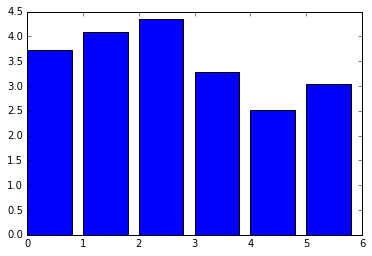

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

# Rankings
So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

## Finding The Most Seen Movie
You cleaned up the seen columns earlier, and converted the values to the Boolean type. When you call methods like sum() or mean(), Booleans are treated like integers -- Trueis treated like a 1, and False is treated like a 0. This makes it easy to figure out how many people have seen each movie -- we just take the sum of the column.

In [78]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

<Container object of 6 artists>

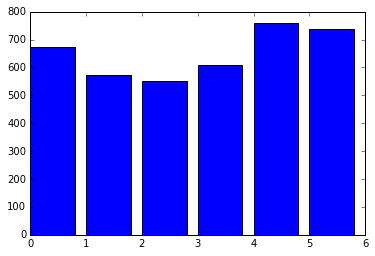

In [79]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

# View counts
It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Exploring The Data By Binary Segments
We've seen what the whole survey population thinks are the highest ranked movies, but we can break this down by segments. There are several columns that segment our data into two groups, including:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` -- `True` or `False`.
- `Do you consider yourself to be a fan of the Star Trek franchise?` -- `Yes` or `No`.
- `Gender` -- `Male` or `Female`.

You can split a Dataframe into two groups based on a binary column by taking two subsets. Here, we'll split on the Gender column:
```python
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
```
We can compute statistics like the most seen movie and the highest ranked movie separately for each group.

In [98]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

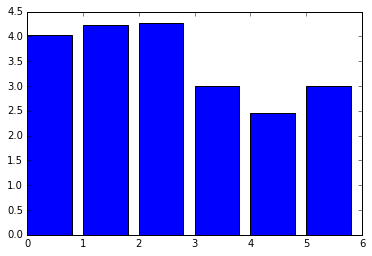

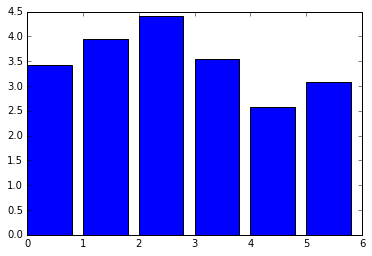

In [99]:
plt.bar(range(6), males[males.columns[9:15]].mean())
plt.show()

plt.bar(range(6), females[females.columns[9:15]].mean())
plt.show()

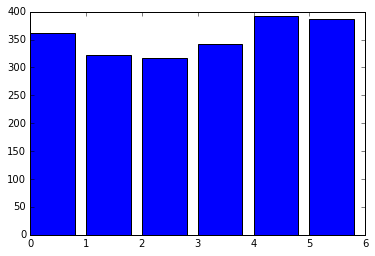

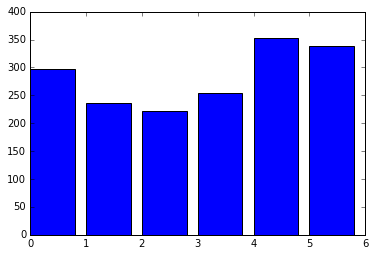

In [100]:
plt.bar(range(6), males[males.columns[3:9]].sum())
plt.show()

plt.bar(range(6), females[females.columns[3:9]].sum())
plt.show()

# Male/Female differences in favorite Star Wars movie and most seen movie
Interestingly, more males watches episodes 1-3, but males liked them far less than females did.

## Next Steps

- Try to segment the data by columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which have to do with what characters are viewed favorably and unfavorably.
- Which character is the most liked?
- Which character is the most disliked?
- Which character creates the most controversy? (split between dislikes and likes)